In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# single site operators

x_plus_1 = np.array(np.matrix([[0,0,0],[0,0,0],[0,1,0]]))
x_minus_1 = np.array(np.matrix([[0,0,0],[0,0,1],[0,0,0]]))
x_plus_2 = np.array(np.matrix([[0,1,0],[0,0,0],[0,0,0]]))
x_minus_2 = np.array(np.matrix([[0,0,0],[1,0,0],[0,0,0]]))

T_plus_1_1 = np.array(np.matrix([[0,0,0],[0,1,0],[0,0,-1]]))
T_minus_1_1 = T_plus_1_1
T_plus_1_2 = np.array(np.matrix([[0,0,0],[0,0,0],[-1,0,0]]))
T_minus_1_2 = np.array(np.matrix([[0,0,-1],[0,0,0],[0,0,0]]))
T_plus_2_1 = T_minus_1_2
T_minus_2_1 = T_plus_1_2
T_plus_2_2 = np.array(np.matrix([[-1,0,0],[0,1,0],[0,0,0]]))
T_minus_2_2 = T_plus_2_2

id = np.eye(3)

# manual operator definitions for two sites

psi_plus_1_1 = np.kron(x_plus_1,id)
psi_minus_1_1 = np.kron(x_minus_1,id)
psi_plus_1_2 = np.kron(x_plus_2,id)
psi_minus_1_2 = np.kron(x_minus_2,id)

psi_plus_2_1 = np.kron(T_plus_1_1, x_plus_1) + np.kron(T_plus_1_2, x_plus_2)
psi_minus_2_1 = np.kron(T_minus_1_1, x_minus_1) + np.kron(T_minus_1_2, x_minus_2)
psi_plus_2_2 = np.kron(T_plus_2_1, x_plus_1) + np.kron(T_plus_2_2, x_plus_2)
psi_minus_2_2 = np.kron(T_minus_2_1, x_minus_1) + np.kron(T_minus_2_2, x_minus_2)

n_1 = psi_plus_1_1 @ psi_minus_1_1 + psi_plus_1_2 @ psi_minus_1_2
n_2 = psi_plus_2_1 @ psi_minus_2_1 + psi_plus_2_2 @ psi_minus_2_2
total_n = n_1 + n_2
operator = total_n

In [3]:
"""# around J/V = 0

N = 2
M = 3
V = 1

J_V_ratios = np.linspace(0,0.1,100)

mu_V_ratio = 0

total_occupations = []

for J_V_ratio in J_V_ratios:
    hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio = 0, J_V_ratio = J_V_ratio)
    eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
    occupation_1_by_state = []
    occupation_2_by_state = []
    total_occupations_by_state = []
    for state in eigenvectors:
        occ = state.T.conj() @ operator @ state
        total_occupations_by_state.append(occ)
    total_occupations.append(total_occupations_by_state)
total_occupations = np.array(total_occupations)

colors = get_cmap("winter", M**N)

for i in range(M**N):
    fig, ax = plt.subplots(figsize = (5.5,4))
    ax.plot(J_V_ratios, total_occupations[:,i], color = colors(i))
    ax.plot(J_V_ratios, total_occupations[:,i], '.', color = colors(i))
    ax.set_title(f"Total Paraparticle Occupation $\langle n \\rangle$ for $\phi_{i}$")
    ax.grid()
    ax.set_xlabel("$J/|V|$")
    ax.set_ylabel(f"$\langle n \\rangle$")
    fig.tight_layout()"""

'# around J/V = 0\n\nN = 2\nM = 3\nV = 1\n\nJ_V_ratios = np.linspace(0,0.1,100)\n\nmu_V_ratio = 0\n\ntotal_occupations = []\n\nfor J_V_ratio in J_V_ratios:\n    hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio = 0, J_V_ratio = J_V_ratio)\n    eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)\n    occupation_1_by_state = []\n    occupation_2_by_state = []\n    total_occupations_by_state = []\n    for state in eigenvectors:\n        occ = state.T.conj() @ operator @ state\n        total_occupations_by_state.append(occ)\n    total_occupations.append(total_occupations_by_state)\ntotal_occupations = np.array(total_occupations)\n\ncolors = get_cmap("winter", M**N)\n\nfor i in range(M**N):\n    fig, ax = plt.subplots(figsize = (5.5,4))\n    ax.plot(J_V_ratios, total_occupations[:,i], color = colors(i))\n    ax.plot(J_V_ratios, total_occupations[:,i], \'.\', color = colors(i))\n    ax.set_title(f"Total Paraparticle Occupation $\\langle n \\rangle$ for $\\phi_{i}$")\n  

In [4]:
def paraparticle_specific_heat(beta, kB, V):
    numerator = 16 * V**2 * beta**2 * (4 + 5 * np.cosh(2 * V * beta)) * kB
    denominator = (5 + 4 * np.cosh(2 * V * beta))**2
    return numerator / denominator

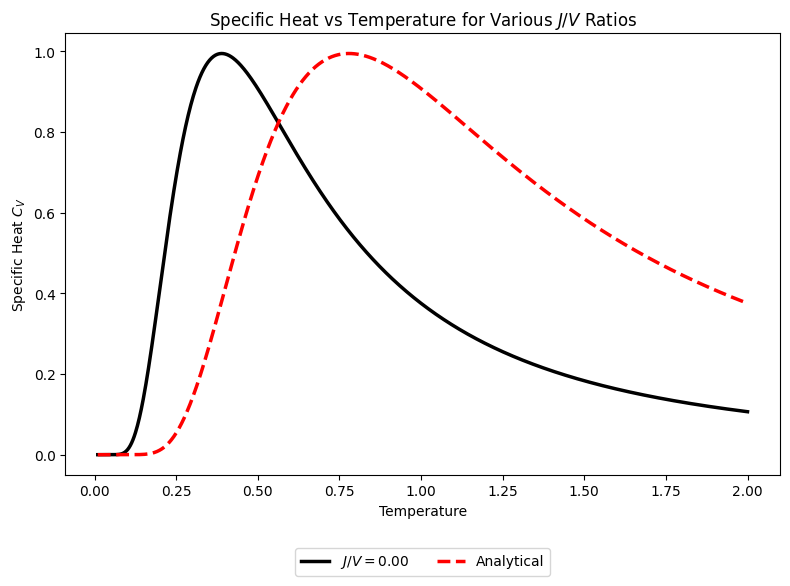

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

N = 2
M = 3
V = 1
J_V_ratios = [0]
colors = get_cmap("gist_rainbow", len(J_V_ratios))

temperatures = np.linspace(0.01,2,1000)
betas = 1/temperatures
for i, J_V_ratio in enumerate(J_V_ratios):
    Cv_values = []
    analytical_Cvs = []
    
    hamiltonian = construct_hamiltonian(N, M, V, mu = 0, J = 0, boundary_conditions= "OBC")
    eigenvalues, eigenvectors = exact_diagonalize(hamiltonian)
    
    for beta in betas:
        Cv = calculate_specific_heat(beta, eigenvalues)
        Cv_values.append(Cv)
        
        V_eff = 1
        analytical_Cv = paraparticle_specific_heat(beta, 1, V_eff)
        analytical_Cvs.append(analytical_Cv)
        
    if J_V_ratio == 0:
        color = "k"
        linewidth = 2.5
    else:
        color = colors(i)
        linewidth = 1.25
    
    ax.plot(temperatures, Cv_values, color=color, linewidth = linewidth, label=f"$J/V = {J_V_ratio:.2f}$")
    ax.plot(temperatures, analytical_Cvs, "r", linestyle='--', linewidth=linewidth, label=f"Analytical")
    
ax.set_xlabel("Temperature")
ax.set_ylabel("Specific Heat $C_V$")
#ax.set_xscale("log")
ax.set_title("Specific Heat vs Temperature for Various $J/V$ Ratios")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncols=5)
plt.tight_layout()
plt.show()